In [6]:
a=[0,0,1,1,0,0,
   0,1,0,0,1,0,
   1,1,1,1,1,1,
   1,0,0,0,0,1,
   1,0,0,0,0,1]

b=[0,1,1,1,1,0,
   0,1,0,0,1,0,
   0,1,1,1,1,0,
   0,1,0,0,1,0,
   0,1,1,1,1,0]

c=[0,1,1,1,1,0,
   0,1,0,0,0,0,
   0,1,0,0,0,0,
   0,1,0,0,0,0,
   0,1,1,1,1,0]

In [7]:
y=[[1,0,0,],
   [0,1,0],
   [0,0,1]]

In [8]:
import numpy as np
import matplotlib.pyplot as plt

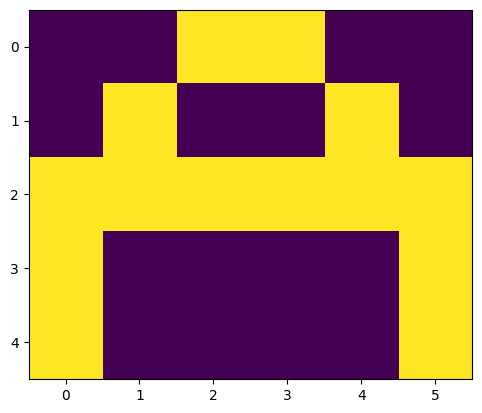

In [9]:
plt.imshow(np.array(a).reshape(5,6))
plt.show()

In [10]:
x=[np.array(a).reshape(1,30),np.array(b).reshape(1,30),np.array(c).reshape(1,30)]
y=np.array(y)
print(x,"\n\n",y)

[array([[0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 1]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 0]]), array([[0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 1, 1, 1, 1, 0]])] 

 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [11]:
def sigmoid(x):
    retuen(1/(1+np.exp(-x)))

In [12]:
def f_forward(x,w1,w2):
    z1=x.dot(w1)
    a1=sigmoid(z1)

    z2=x.dot(w2)
    a2=sigmoid(z2)
    return(a2)

In [14]:
def generate_wt(x,y):
    l=[]
    for i in range(x*y):
        l.append(np.random.randn())
    return(np.array(l).reshape(x,y))

In [15]:
def loss(out, y):
    s=(np.square(out-y))
    s=np.sum(s)/len(y)
    return(s)

In [16]:
def back_prop(x,y,w1,w2,alpha):
    z1=x.dot(w1)
    a1=sigmoid(z1)
    z2=x.dot(w2)
    a2=sigmoid(z2)
    d2=(a2-y)
    d1=np.multiply((w2.dot((d2.transpose())))).transpose(),(np.multiply(a1,1-a1))
    w1_adj=x.transpose().dot(d1)
    w2_adj=a1.transpose().dot(d2)
    w1=w1-(aplha*(w1_adj))
    w2=w2-(aplha*(w2_adj))
    return (w1,w2)

In [24]:
def train(x,y,w1,w2,alpha=0.01,epoch=10):
    acc=[]
    loss=[]
    for j in range(epoch):
        l=[]
        for i in range(len(x)):
            out=f_forward(x[i],w1,w2)
            l.append((loss(out,y[i])))
            w1,w2=back_prop(x[i],y[i],w1,w2,alpha)
        print("Epochs:",j+1,"acc:",(1-(sum(l)/len(x)))*100)
        acc.append((1-(sum(l)/len(x)))*100)
        loss.append(sum(l)/len(x))
    return(acc,loss,w1,w2)

In [28]:
def predict(x,w1,w2):
    out=f_forward(x,w1,w2)
    maxm=0
    k=0
    for i in range(len(out([0]))):
        if(maxm<out[0][i]):
            maxm=out[0][i]
            k=i
        if (k==0):
            print("image is a letter of a")
        elif(k==1):
            print("image is of letter b")
        else:
            print("image is of letter c")
        plt.imshow(x.reshape(5,6))
        plt.show()

In [29]:
w1=generate_wt(30,5)
w2=generate_wt(5,3)
print(w1,"\n",w2)

[[-2.11081930e-01  3.17854838e-02  3.43109787e-02  1.14119911e+00
   1.41326202e+00]
 [-1.02274687e+00 -9.17364085e-01 -1.37924389e+00  8.20285002e-01
  -1.75787546e-01]
 [ 6.46781481e-01  2.91768268e-01  6.62181104e-01  3.71765090e-02
   5.81459759e-01]
 [-9.06124375e-02  3.84309495e-01  1.61617323e+00  5.20499899e-01
   1.85193591e+00]
 [ 9.37126499e-01  1.71939232e+00 -1.11556986e-02  4.29755668e-01
  -1.56174505e+00]
 [-8.00915373e-01 -1.42654665e-01  6.01335392e-01  1.02373683e+00
  -2.95232012e-01]
 [-9.38964785e-01  8.38546469e-01 -2.00850287e-01  8.85698763e-02
  -2.32373882e-01]
 [-4.84184489e-01  4.62085621e-01 -1.05429290e+00  5.59981296e-01
  -1.86427506e+00]
 [ 9.13236743e-01 -4.53689735e-01  1.03562010e+00  3.07227756e-01
  -8.01361036e-01]
 [ 6.14624934e-01 -1.20197130e+00 -3.48359936e-01  8.41564442e-01
  -1.15647058e-01]
 [-7.25620295e-01 -9.25230312e-01  1.15630140e+00 -7.39165865e-01
  -4.36321396e-01]
 [ 5.02031295e-01  4.00112599e-02 -1.07061101e+00  2.10098722e+00

In [ ]:
acc,loss,w1,w2=train(x,y,w1,w2,0.1,100)

In [ ]:
import matplotlib.pyplot as plt1
plt1.plot(acc)
plt.ylabel('Accuracy')
plt.xlabel("epochs :")
plt1.show()

In [ ]:
plt1.plot(losss)
plt.ylabel('Loss')
plt.xlabel("Epochs:")
plt1.show()

In [33]:
print(w1,"\n",w2)

[[-2.11081930e-01  3.17854838e-02  3.43109787e-02  1.14119911e+00
   1.41326202e+00]
 [-1.02274687e+00 -9.17364085e-01 -1.37924389e+00  8.20285002e-01
  -1.75787546e-01]
 [ 6.46781481e-01  2.91768268e-01  6.62181104e-01  3.71765090e-02
   5.81459759e-01]
 [-9.06124375e-02  3.84309495e-01  1.61617323e+00  5.20499899e-01
   1.85193591e+00]
 [ 9.37126499e-01  1.71939232e+00 -1.11556986e-02  4.29755668e-01
  -1.56174505e+00]
 [-8.00915373e-01 -1.42654665e-01  6.01335392e-01  1.02373683e+00
  -2.95232012e-01]
 [-9.38964785e-01  8.38546469e-01 -2.00850287e-01  8.85698763e-02
  -2.32373882e-01]
 [-4.84184489e-01  4.62085621e-01 -1.05429290e+00  5.59981296e-01
  -1.86427506e+00]
 [ 9.13236743e-01 -4.53689735e-01  1.03562010e+00  3.07227756e-01
  -8.01361036e-01]
 [ 6.14624934e-01 -1.20197130e+00 -3.48359936e-01  8.41564442e-01
  -1.15647058e-01]
 [-7.25620295e-01 -9.25230312e-01  1.15630140e+00 -7.39165865e-01
  -4.36321396e-01]
 [ 5.02031295e-01  4.00112599e-02 -1.07061101e+00  2.10098722e+00

In [34]:
predict(x[2],w1,w2)

NameError: name 'retuen' is not defined